In [24]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import Sequential
from tensorflow.keras.losses import MeanSquaredError, BinaryCrossentropy
from tensorflow.keras.activations import sigmoid
from lab_utils_common import dlc
from lab_neurons_utils import plt_prob_1d, sigmoidnp, plt_linear, plt_logistic
plt.style.use('./deeplearning.mplstyle')
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

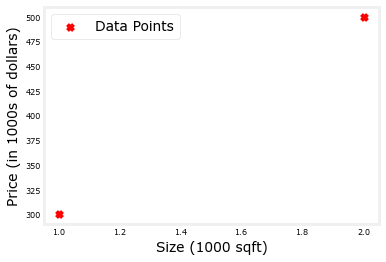

In [25]:
X_train = np.array([[1.0], [2.0]], dtype=np.float32)           #(size in 1000 square feet)
Y_train = np.array([[300.0], [500.0]], dtype=np.float32)       #(price in 1000s of dollars)

fig, ax = plt.subplots(1,1)
ax.scatter(X_train, Y_train, marker='x', c='r', label="Data Points")

ax.legend( fontsize='xx-large')
ax.set_ylabel('Price (in 1000s of dollars)', fontsize='xx-large')
ax.set_xlabel('Size (1000 sqft)', fontsize='xx-large')

plt.show()

In [26]:
linear_layer = tf.keras.layers.Dense(units=1, activation = 'linear', ) 
linear_layer.get_weights()

a1 = linear_layer(X_train[0].reshape(1,1))
w, b= linear_layer.get_weights()

print(linear_layer.get_weights())

a1 = linear_layer(X_train[0].reshape(1,1))
print(a1)

[array([[1.62]], dtype=float32), array([0.], dtype=float32)]
tf.Tensor([[1.62]], shape=(1, 1), dtype=float32)


In [27]:
set_w = np.array([[200]])
set_b = np.array([100])

linear_layer.set_weights([set_w, set_b])
alin = np.dot(set_w,X_train[0].reshape(1,1)) + set_b

print(alin)

[[300.]]


In [28]:
prediction_tf = linear_layer(X_train)
prediction_np = np.dot( X_train, set_w) + set_b

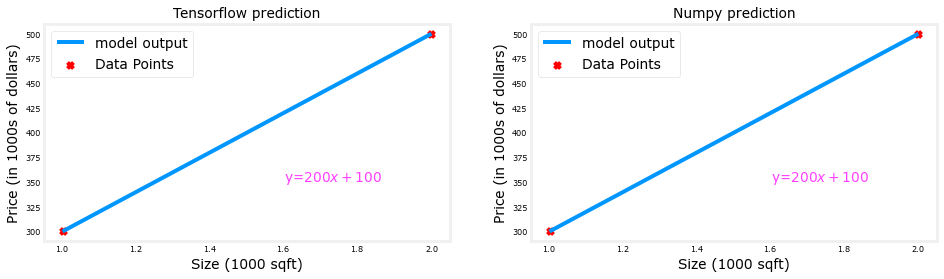

In [29]:
plt_linear(X_train, Y_train, prediction_tf, prediction_np)

In [30]:
a = np.array([0., 1, 2, 3, 4, 5], dtype=np.float32)

X_train = np.array([0., 1, 2, 3, 4, 5], dtype=np.float32).reshape(-1,1)  # 2-D Matrix
Y_train = np.array([0,  0, 0, 1, 1, 1], dtype=np.float32).reshape(-1,1)  # 2-D Matrix

print(a)
print(X_train)

[0. 1. 2. 3. 4. 5.]
[[0.]
 [1.]
 [2.]
 [3.]
 [4.]
 [5.]]


In [31]:

pos = Y_train == 1
neg = Y_train == 0
print(X_train[pos])
print(X_train[neg])
print(Y_train[pos])
print(Y_train[neg])

[3. 4. 5.]
[0. 1. 2.]
[1. 1. 1.]
[0. 0. 0.]


In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from lab_utils_common import dlc
from lab_coffee_utils import load_coffee_data, plt_roast, plt_prob, plt_layer, plt_network, plt_output_unit
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

In [3]:
X,Y = load_coffee_data();
print(X.shape, Y.shape)

(200, 2) (200, 1)


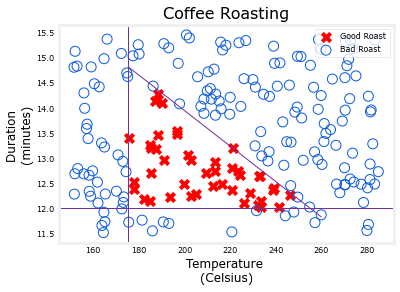

In [4]:
plt_roast(X,Y)

In [21]:
#Normalization
'''

    https://www.tensorflow.org/api_docs/python/tf/keras/layers/Normalization

'''

x = X[:10]
print(x)
norm_l = tf.keras.layers.Normalization(axis=-1)
norm_l.adapt(x)  # learns mean, variance
x_change = norm_l(x)

print(x_change)


[[185.32  12.69]
 [259.92  11.87]
 [231.01  14.41]
 [175.37  11.72]
 [187.12  14.13]
 [225.91  12.1 ]
 [208.41  14.18]
 [207.08  14.03]
 [280.6   14.23]
 [202.87  12.25]]
tf.Tensor(
[[-0.97 -0.44]
 [ 1.37 -1.21]
 [ 0.46  1.17]
 [-1.29 -1.35]
 [-0.92  0.91]
 [ 0.3  -1.  ]
 [-0.25  0.95]
 [-0.29  0.82]
 [ 2.02  1.  ]
 [-0.42 -0.86]], shape=(10, 2), dtype=float32)
